<a href="https://colab.research.google.com/github/wadhwaniv1/Lyrics-Generation-using-RNN-/blob/main/lyrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the necessary libraries required
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# importing dataset in .txt format
# loading the dataset file and display lyrics
lyric=open('lorde.txt').read()
print(lyric[:2000])

Well, summer slipped us underneath her tongue
Our days and nights are perfumed with obsession
Half of my wardrobe is on your bedroom floor
Use our eyes, throw our hands overboard
I am your sweetheart psychopathic crush
Drink up your movements, still I can't get enough
I overthink your punctuation use
Not my fault, just a thing that my mind do
A rush at the beginning
I get caught up, just for a minute
But lover, you're the one to blame
All that you're doing
Can you hear the violence?
Megaphone to my chest
Broadcast the boom, boom, boom, boom
And make 'em all dance to it
Broadcast the boom, boom, boom, boom
And make 'em all dance to it
Broadcast the boom, boom, boom, boom
And make 'em all dance to it
Broadcast the boom, boom, boom, boom
And make 'em all dance to it
Broadcast the boom, boom, boom, boom
And make 'em all dance to it
Our thing progresses
I call and you come through
Blow all my friendships
To sit in hell with you
But we're the greatest
They'll hang us in the Louvre
Well, summ

In [ ]:
# pre-processing datset
# converting into lowercase and split the datset
corpus=lyric.lower().split('\n')
for i in range(40,60):
  print(corpus[i])

but lover, you're the one to blame
all that you're doing
can you hear the violence?
megaphone to my chest
broadcast the boom, boom, boom, boom
and make 'em all dance to it
broadcast the boom, boom, boom, boom
and make 'em all dance to it
broadcast the boom, boom, boom, boom
and make 'em all dance to it
broadcast the boom, boom, boom, boom
and make 'em all dance to it
broadcast the boom, boom, boom, boom
and make 'em all dance to it
our thing progresses
i call and you come through
blow all my friendships
to sit in hell with you
but we're the greatest
they'll hang us in the louvre


In [ ]:
# tokenizing
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
total_words
word_index = tokenizer.word_index
print(word_index)

{'boom': 1, 'the': 2, 'to': 3, 'and': 4, 'all': 5, 'my': 6, 'i': 7, 'broadcast': 8, 'make': 9, "'em": 10, 'dance': 11, 'it': 12, 'our': 13, 'your': 14, 'a': 15, 'you': 16, 'us': 17, 'with': 18, 'use': 19, 'up': 20, 'get': 21, 'just': 22, 'thing': 23, 'that': 24, 'but': 25, "you're": 26, 'in': 27, 'well': 28, 'summer': 29, 'slipped': 30, 'underneath': 31, 'her': 32, 'tongue': 33, 'days': 34, 'nights': 35, 'are': 36, 'perfumed': 37, 'obsession': 38, 'half': 39, 'of': 40, 'wardrobe': 41, 'is': 42, 'on': 43, 'bedroom': 44, 'floor': 45, 'eyes': 46, 'throw': 47, 'hands': 48, 'overboard': 49, 'am': 50, 'sweetheart': 51, 'psychopathic': 52, 'crush': 53, 'drink': 54, 'movements': 55, 'still': 56, "can't": 57, 'enough': 58, 'overthink': 59, 'punctuation': 60, 'not': 61, 'fault': 62, 'mind': 63, 'do': 64, 'rush': 65, 'at': 66, 'beginning': 67, 'caught': 68, 'for': 69, 'minute': 70, 'lover': 71, 'one': 72, 'blame': 73, 'doing': 74, 'can': 75, 'hear': 76, 'violence': 77, 'megaphone': 78, 'chest': 7

In [ ]:
# using list of tokens create input sequences
input_sequences = []
for line in corpus:
 token_list = tokenizer.texts_to_sequences([line])[0]
 
 for i in range(1, len(token_list)):
     n_gram_sequence = token_list[:i+1]
     input_sequences.append(n_gram_sequence)
for i in range(20):
 print(input_sequences[i])

[28, 29]
[28, 29, 30]
[28, 29, 30, 17]
[28, 29, 30, 17, 31]
[28, 29, 30, 17, 31, 32]
[28, 29, 30, 17, 31, 32, 33]
[13, 34]
[13, 34, 4]
[13, 34, 4, 35]
[13, 34, 4, 35, 36]
[13, 34, 4, 35, 36, 37]
[13, 34, 4, 35, 36, 37, 18]
[13, 34, 4, 35, 36, 37, 18, 38]
[39, 40]
[39, 40, 6]
[39, 40, 6, 41]
[39, 40, 6, 41, 42]
[39, 40, 6, 41, 42, 43]
[39, 40, 6, 41, 42, 43, 14]
[39, 40, 6, 41, 42, 43, 14, 44]


In [ ]:
# padding either post-padding or pre-padding
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len,padding='pre'))
print(max_sequence_len)
print(input_sequences)

10
[[ 0  0  0 ...  0 28 29]
 [ 0  0  0 ... 28 29 30]
 [ 0  0  0 ... 29 30 17]
 ...
 [ 0  0  0 ... 91 17 27]
 [ 0  0  0 ... 17 27  2]
 [ 0  0  0 ... 27  2 92]]


In [ ]:
print(input_sequences.shape)
print(max_sequence_len)

(5688, 10)
10


In [ ]:
# Model building
model = Sequential()
model.add(Embedding(1372, 160, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(200, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(1372/2, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(93, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 9, 160)            219520    
_________________________________________________________________
bidirectional (Bidirectional (None, 9, 400)            577600    
_________________________________________________________________
dropout (Dropout)            (None, 9, 400)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               200400    
_________________________________________________________________
dense (Dense)                (None, 686)               69286     
_________________________________________________________________
dense_1 (Dense)              (None, 93)                63891     
Total params: 1,130,697
Trainable params: 1,130,697
Non-trainable params: 0
______________________________________________

In [ ]:
# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
label = ku.to_categorical(label, num_classes=total_words)

In [ ]:
# model training
history = model.fit(predictors, label, epochs=50, verbose=1)

Epoch 1/50
178/178 [==============================] - 20s 83ms/step - loss: 0.1351 - accuracy: 0.1106
Epoch 2/50
178/178 [==============================] - 15s 83ms/step - loss: 0.0567 - accuracy: 0.1215
Epoch 3/50
178/178 [==============================] - 15s 83ms/step - loss: 0.0551 - accuracy: 0.1232
Epoch 4/50
178/178 [==============================] - 15s 82ms/step - loss: 0.0549 - accuracy: 0.1225
Epoch 5/50
178/178 [==============================] - 15s 82ms/step - loss: 0.0546 - accuracy: 0.1203
Epoch 6/50
178/178 [==============================] - 15s 82ms/step - loss: 0.0532 - accuracy: 0.1334
Epoch 7/50
178/178 [==============================] - 15s 83ms/step - loss: 0.0503 - accuracy: 0.1677
Epoch 8/50
178/178 [==============================] - 15s 83ms/step - loss: 0.0483 - accuracy: 0.1923
Epoch 9/50
178/178 [==============================] - 15s 83ms/step - loss: 0.0459 - accuracy: 0.2247
Epoch 10/50
178/178 [==============================] - 15s 83ms/step - loss: 0.044

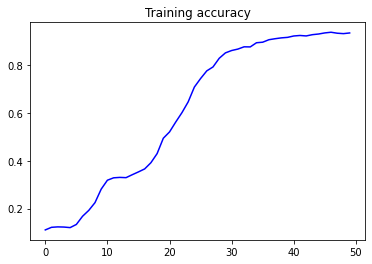

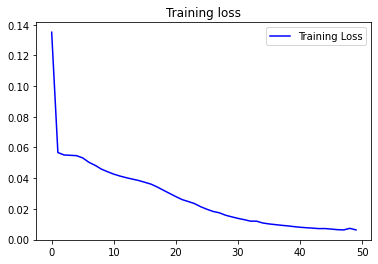

In [ ]:
# result analysis
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()

In [ ]:
# testing random samples using model
next_words = 10
seed_text = "ive never seen a diamond in the flesh i cut my"
for _ in range(next_words):
 token_list = tokenizer.texts_to_sequences([seed_text])[0]
 token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
 predicted = model.predict_classes(token_list, verbose=0)
 output_word = ""
 for word, index in tokenizer.word_index.items():
     if index == predicted:
         output_word = word
         break
 seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


ive never seen a diamond in the flesh i cut my fault just a thing that my mind do do obsession
